# Predict Loan Applications

In [24]:
import pandas as pd
from path import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [3]:
# Load data
file_path = Path('Resources/loans_data_encoded.csv')
df_loans = pd.read_csv(file_path)
df_loans.head()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


### Preprocess the Data

In [4]:
# Define the features
X = df_loans.copy()
X = X.drop("bad", axis=1)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [8]:
# Define target set
y = df_loans["bad"].ravel()
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Split into Train and Test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

### Scale the data

In [12]:
scaler = StandardScaler()

# fit standard scaler with training data
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Fit the Random Forest Model

In [29]:
# Create random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# fit the model
rf_model.fit(X_train_scaled, y_train.ravel())

RandomForestClassifier(n_estimators=500, random_state=78)

### Making Predictions Using the Testing Data

In [30]:
predictions = rf_model.predict(X_test_scaled)

In [31]:
predictions

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### Evaluate the model

In [32]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

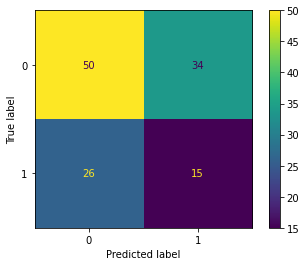

In [33]:
# plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot()

In [36]:
# Create DataFrame from confusion matrix
cm_df = pd.DataFrame(cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,26,15


In [34]:
# calculate accuracy
acc_score = accuracy_score(y_test, predictions)
acc_score

0.52

In [37]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,50,34
Actual 1,26,15


Accuracy Score : 0.52
Classification Report
              precision    recall  f1-score   support

           0       0.66      0.60      0.62        84
           1       0.31      0.37      0.33        41

    accuracy                           0.52       125
   macro avg       0.48      0.48      0.48       125
weighted avg       0.54      0.52      0.53       125



- The precision for bad loan (class 1) is low (.31) which means there is a lot of false positives (Type 1 error)
- The recall for bad loan (class 1) is low (.37) which means there are a lot of false negatives (Type 2 error)

### Rank Important features

In [38]:
# Calculate feature importance in the Random Forest model
importances = rf_model.feature_importances_
importances

array([0.05479564, 0.083734  , 0.42871538, 0.32290918, 0.01986699,
       0.02382607, 0.0025937 , 0.0238055 , 0.01947929, 0.02027425])

In [40]:
# sort features by importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.42871537959784756, 'age'),
 (0.322909180511852, 'month_num'),
 (0.08373400008559587, 'term'),
 (0.054795639837519644, 'amount'),
 (0.023826066130178958, 'education_High School or Below'),
 (0.023805501611235368, 'education_college'),
 (0.020274246776222464, 'gender_male'),
 (0.01986699331709372, 'education_Bachelor'),
 (0.019479294982300867, 'gender_female'),
 (0.0025936971501533874, 'education_Master or Above')]